<a href="https://colab.research.google.com/github/tbradshaw91/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

**Taking a look at the data**

In [2]:
# Looking at the size of DF
df.shape

(2693, 6)

In [3]:
# Looking at the overall picture
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


**Creating a crosstab and calculating percentage**

In [0]:
guests_percentage = pd.crosstab(index=df.Year, columns=df.Occupation, normalize='index') * 100

**Checking out the Summary Statistics**

In [235]:
guests_percentage.describe()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
count,17.000000,17.000000,17.000000,17.000000
mean,44.504864,14.337592,28.052609,13.104935
std,20.006661,6.298285,9.149784,6.569827
min,20.731707,1.204819,6.626506,1.807229
25%,33.742331,10.240964,24.698795,9.036145
50%,38.414634,16.564417,30.303030,13.855422
75%,56.024096,19.254658,32.515337,16.363636
max,90.361446,22.560976,46.951220,24.113475


**Percentage of  "Acting, Comedy & Music " guests in 1999:**

In [9]:
guests_percentage.head(1)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.361446,1.204819,6.626506,1.807229


 **Percentage of "Acting, Comedy & Music " guests in 2015:**

In [10]:
guests_percentage.tail(1)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
2015,45.0,17.0,24.0,14.0


# Part 2 — Recreate this explanatory visualization:

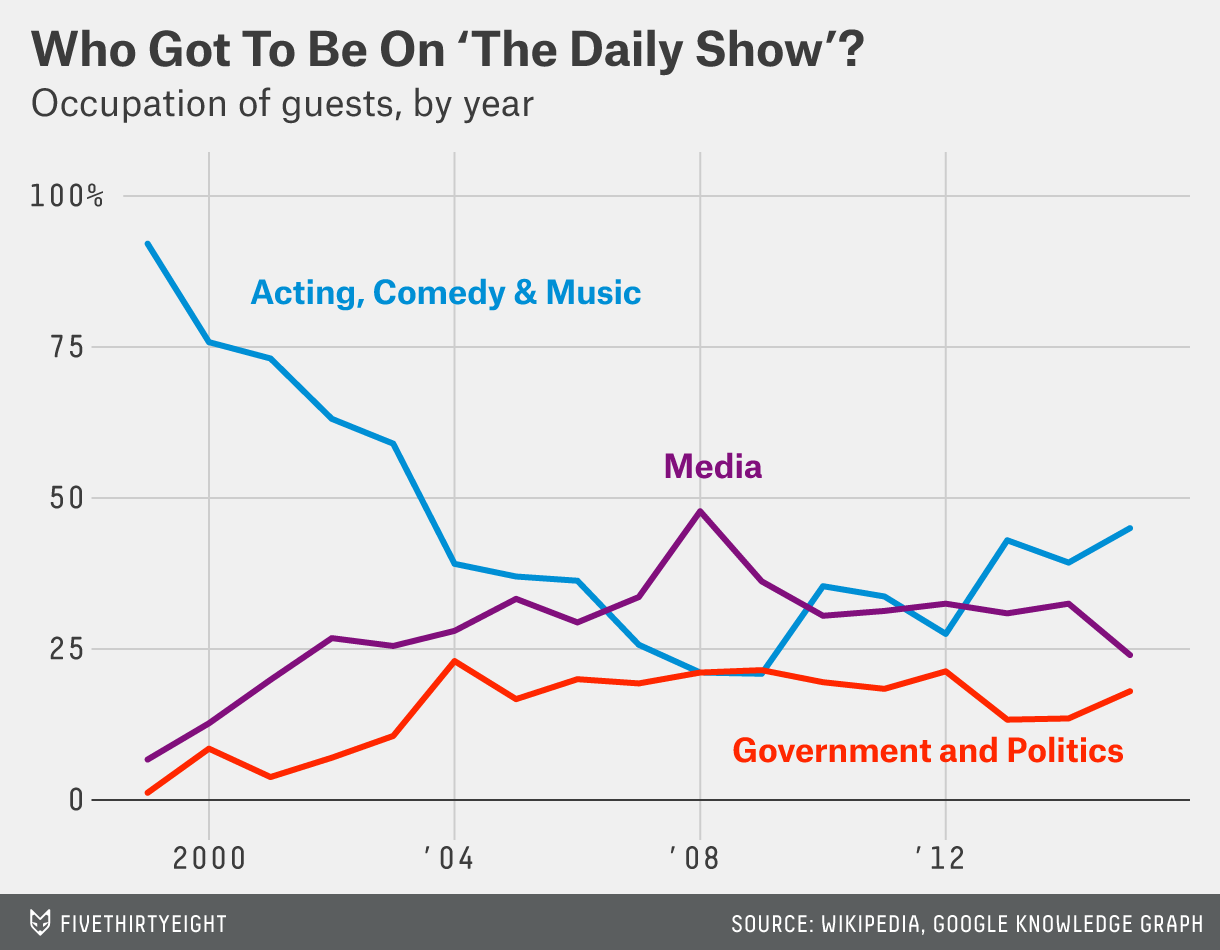

In [11]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

## **Matched the color throughout, changed ticks to match the original **

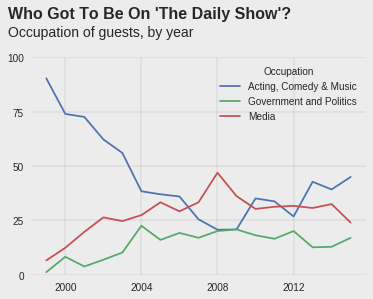

In [217]:
# Specifying which columns I want to use
columns = ['Acting, Comedy & Music', 'Government and Politics', 'Media']

# Using the five thirty eight style
plt.style.context('fivethirtyeight')

fig, ax = plt.subplots()

# I could not find the exact colors to add a cmap in this line below, 
# So I chose to stay with the default
guests_percentage[columns].plot.line(ax=ax)

# Title and subtitle
ax.text(s="Who Got To Be On 'The Daily Show'?", y=118, x=1997, fontsize=16, fontweight='semibold')
ax.text(s="Occupation of guests, by year", y=110, x=1997, fontsize=14)

ax.set_ylim((0,100))
ax.set_xlabel('')

# Could not figure out how to show '04, '08, '12 instead of the full number
# Same thing with showing a % only on 100
ax.set(yticks=range(0, 101, 25), facecolor='#ececec')
plt.xticks(range(2000, 2013, 4))

# Setting the color
fig.patch.set_facecolor('#ececec')

# Changing grid colors
plt.grid(color='grey', linestyle='-', linewidth=0.2);

### **A more visually appealing version of this **

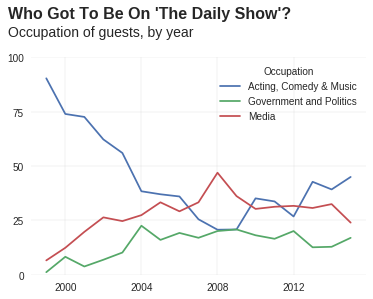

In [213]:
# Specifying which columns I want to use
columns = ['Acting, Comedy & Music', 'Government and Politics', 'Media']

# Using the five thirty eight style
plt.style.context('fivethirtyeight')

fig, ax = plt.subplots()
guests_percentage[columns].plot.line(ax=ax)

# Title and subtitle
ax.text(s="Who Got To Be On 'The Daily Show'?", y=118, x=1997, fontsize=16, fontweight='semibold')
ax.text(s="Occupation of guests, by year", y=110, x=1997, fontsize=14)

ax.set_ylim((0,100))
ax.set_xlabel('')

# Changed the background color to white to make the lines pop
ax.set(yticks=range(0, 101, 25), facecolor='#FFFFFF')
plt.xticks(range(2000, 2013, 4))

# Setting the color of the sides and adjusting the grid
# For a more modern look
# If only, I had more time to mess with the legend
fig.patch.set_facecolor('#FFFFFF');
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

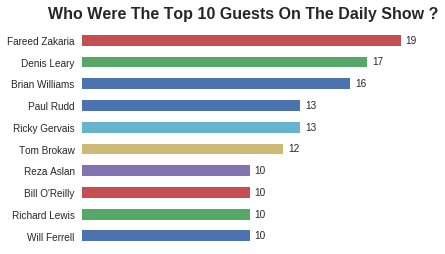

In [233]:
# Sorting the data to show only the top 10
appearances = df['Guest'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots()

# Type of plot
# I prefer bar plots, IMO, they are one of the most visually appealing
ax = appearances.plot.barh(ax=ax)

# Calculating and adding text to the number of appearances
for y_pos, x_pos in enumerate(appearances):
    ax.text(x_pos + 0.3, y_pos - 0.12, str(x_pos), 
            fontweight='light', fontsize=10)

# Hiding the x-axis
ax.xaxis.set_visible(False)


# Setting the colors
fig.patch.set_facecolor('#FFFFFF')
ax.set(facecolor='#FFFFFF')

# Title 
ax.text(s="Who Were The Top 10 Guests On The Daily Show ?", 
        y=10, x=-2, fontsize=16, fontweight='semibold');
